In [7]:
import random
import numpy as np

In [10]:
class Kmeans_algo():
    def __init__(self, k = 3 , n_iter = 100):
        self.k = k
        self.n_iter = n_iter
        self.centroid = None

    def fit_predict(self, X ,y):
        # intialize the centroid
        random_index = random.sample(range(0,X.shape[0]), self.k)
        self.centroid = X[random_index]

        for i in range(self.n_iter):
            # Assign the cluster to each of the datapoint
            cluster_group = self.assign_cluster(X) 
            old_centroid = self.centroid
    
            # Move the centroid
            self.centroid = self.Move_centroid(X,cluster_group)
    
            # Decide when to stop
            if (old_centroid == self.centroid).all():
                break
        return cluster_group

    def assign_cluster(self, X ):
        cluster_group = []
        distances = []

        for row in X :
            for centroid in self.centroid:
                distances.append(np.sqrt(np.sum((row-centroid)**2)))

            min_distance = min(distances)
            cluster_group.append(distances.index(min_distance))
            distances.clear()

        return np.array(cluster_group)

    def Move_centroid(self , X ,cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for types in cluster_type:
            new_centroids.append( X[cluster_group == types].mean(axis=0))
        return np.array(new_centroids)
                

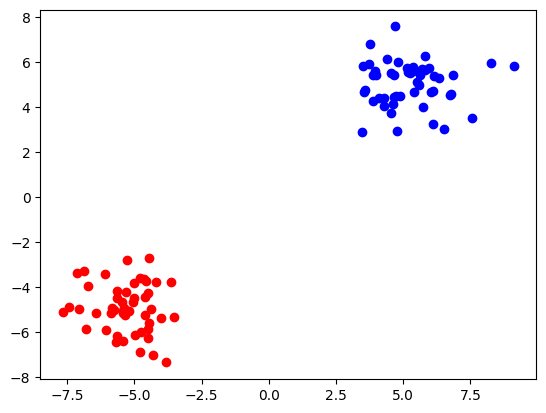

In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

centroids = [(-5,-5),(5,5)]
cluster_std = [1,1]

X,y = make_blobs(n_samples = 100 , cluster_std = cluster_std , centers=centroids, n_features=2, random_state = 2)

km = Kmeans_algo( k = 2 , n_iter=100)
y_means = km.fit_predict(X,y)

plt.scatter(X[y_means == 0,0],X[y_means==0,1], color='red')
plt.scatter(X[y_means == 1,0],X[y_means==1,1], color='blue')

plt.show()